<a href="https://www.kaggle.com/code/ahmedyousryali/house-prices-prediction?scriptVersionId=235224209" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Prices Prediction: Exploratory Data Analysis and Regression Modeling

### Importing Necessary Libraries

In [1]:
# Importing operating system module
import os

# Importing numerical and data manipulation libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statistical libraries
from scipy import stats
from scipy.stats import ttest_ind

# Importing machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Exploring Dataset Contents

In [2]:
# Explore the contents of the '/kaggle/input' directory and print the file names
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


### Loading Dataset

In [3]:
# Load the training and testing datasets into Pandas DataFrames
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col="Id")
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col="Id")

### Displaying Training and Testing Dataset

In [4]:
# Display the first few rows of the training dataset
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display the first few rows of the testing dataset
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Data cleaning

### Handling Missing Values

In [6]:
# Check and display the count of missing values in the training dataset, sorted in descending order
train_data.isna().sum()[train_data.isna().sum() != 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [7]:
# Calculate and display the maximum percentage of missing values in the training dataset
missing_percentage = (train_data.isna().mean() * 100).round(2)
missing_percentage.max()

99.52

In [8]:
# Identify and display the feature (column) with the maximum percentage of missing values in the training dataset
missing_percentage.idxmax()

'PoolQC'

### Handling the Categorical Values

In [9]:
# Define lists of features related to garage and basement
garage_feats = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
basement_feats = ['BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2'] 

# Replace missing values in specific columns with appropriate labels in the training dataset
train_data['PoolQC'] = train_data['PoolQC'].replace({np.nan:'No Pool'})
train_data['MiscFeature'] = train_data['MiscFeature'].replace({np.nan:'None'})
train_data['Alley'] = train_data['Alley'].replace({np.nan:'No alley access'})
train_data['Fence'] = train_data['Fence'].replace({np.nan:'No Fence'})
train_data['MasVnrType'] = train_data['MasVnrType'].replace({np.nan:'None'})
train_data['FireplaceQu'] = train_data['FireplaceQu'].replace({np.nan:'No Fireplace'})
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].replace({np.nan:0})
train_data[garage_feats] = train_data[garage_feats].replace({np.nan:'No Garage'})
train_data[basement_feats] = train_data[basement_feats].replace({np.nan:'No Basement'})

# Recheck and display the count of missing values in the training dataset after handling specific cases
train_data.isna().sum()[train_data.isna().sum() != 0].sort_values(ascending=False)

LotFrontage    259
MasVnrArea       8
Electrical       1
dtype: int64

### Handling the Numeric Values

In [10]:
# Fill missing values in 'LotFrontage' and 'MasVnrArea' columns with their respective means in the training dataset
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace=True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(), inplace=True)

# Recheck and display the count of missing values in the training dataset after imputing numeric values
train_data.isna().sum()[train_data.isna().sum() != 0].sort_values(ascending=False)

Electrical    1
dtype: int64

### Handling Remaining Missing Values: Dropping Rows with Null Values in 'Electrical'

In [11]:
# Drop rows with missing values in any column (specifically for 'Electrical' column)
train_data = train_data.dropna()

# Display the count of missing values after removing null values
print("After Removing Null Values:", sum(train_data.isna().sum()))

After Removing Null Values: 0


### Extracting and Displaying Numerical Columns

In [12]:
# Extract and display the numerical columns from the training dataset
numerical_columns_names = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = train_data[numerical_columns_names]
numerical_columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


### Descriptive Statistics of Numerical Columns

In [13]:
# Display descriptive statistics of the numerical columns in the training dataset
numerical_columns.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,70.047936,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.756328,443.943797,46.581220,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,22.031439,9984.666267,1.383171,1.113079,30.199555,20.644343,180.610600,456.106417,161.369977,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,70.049958,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analyzing Correlation with SalePrice

In [14]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Analyze and display the correlation values with 'SalePrice', sorted in descending order
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Correlation with SalePrice:\n", correlation_with_target)

Correlation with SalePrice:
 SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.475233
Fireplaces       0.466968
BsmtFinSF1       0.386436
LotFrontage      0.334922
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
GarageYrBlt      0.261413
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: Sal

### Handling Outliers: Z-Score Method

In [15]:
# Calculate Z-Score for each numeric column
z_scores = np.abs(stats.zscore(numerical_columns))

# Define a threshold for Z-Score
threshold = 3

# Identify and mark outliers based on the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers from the DataFrame and create a new DataFrame without outliers
train_data_no_outliers = train_data[~outliers]
train_data_no_outliers

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
7,20,RL,75.0,10084,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,307000
11,20,RL,70.0,11200,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,20,RL,78.0,9262,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,5,2009,New,Partial,287090
1453,180,RM,35.0,3675,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,5,2006,WD,Normal,145000
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,10,2009,WD,Normal,185000


### Normality Test for 'SalePrice'

KS Test Statistic: 1.0
P-value: 0.0
The 'SalePrice' variable does not follow a normal distribution (reject the null hypothesis)


<Axes: ylabel='Density'>

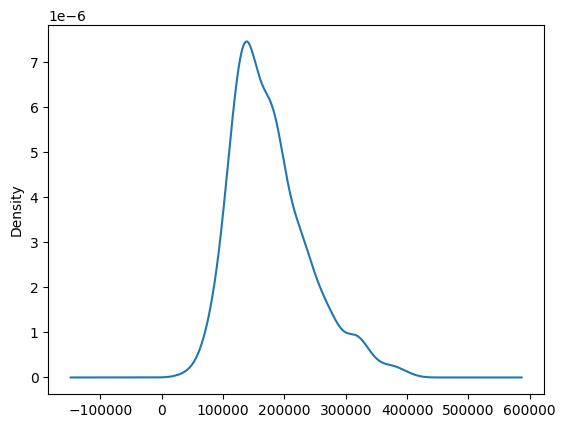

In [16]:
# Extract the 'SalePrice' column from the DataFrame without outliers
sale_price = train_data_no_outliers['SalePrice']

# Perform the Kolmogorov-Smirnov (KS) test for normality
statistic, p_value = stats.kstest(sale_price, 'norm')

# Print the results of the KS test
print(f"KS Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results based on the significance level (alpha)
alpha = 0.05
if p_value > alpha:
    print("The 'SalePrice' variable follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The 'SalePrice' variable does not follow a normal distribution (reject the null hypothesis)")

# Plot the kernel density estimate (KDE) for 'SalePrice'
train_data_no_outliers['SalePrice'].plot(kind='kde')

### Comparing 'OverallQual' for Houses with and without 'CentralAir'

In [17]:
# Extract 'OverallQual' for houses with 'CentralAir' and without 'CentralAir'
overall_qual_with_central_air = train_data_no_outliers.loc[train_data_no_outliers['CentralAir'] == 'Y', 'OverallQual']
overall_qual_without_central_air = train_data_no_outliers.loc[train_data_no_outliers['CentralAir'] == 'N', 'OverallQual']

# Calculate means for each group
mean_with_central_air = overall_qual_with_central_air.mean()
mean_without_central_air = overall_qual_without_central_air.mean()

# Print the means
print("Mean OverallQual with CentralAir:", mean_with_central_air)
print("Mean OverallQual without CentralAir:", mean_without_central_air)

Mean OverallQual with CentralAir: 6.201933404940924
Mean OverallQual without CentralAir: 4.675675675675675


### Independent t-test for 'OverallQual' with and without 'CentralAir'

In [18]:
# Perform an independent t-test
t_statistic, p_value = ttest_ind(overall_qual_with_central_air, overall_qual_without_central_air)

# Display the results of the t-test
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check for significance based on the significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print('The difference in means is statistically significant.')
else:
    print('There is no statistically significant difference in means.')

T-statistic: 7.248387012517131
P-value: 8.628065116142646e-13
The difference in means is statistically significant.


## Data Visualization

### Histogram of SalePrice

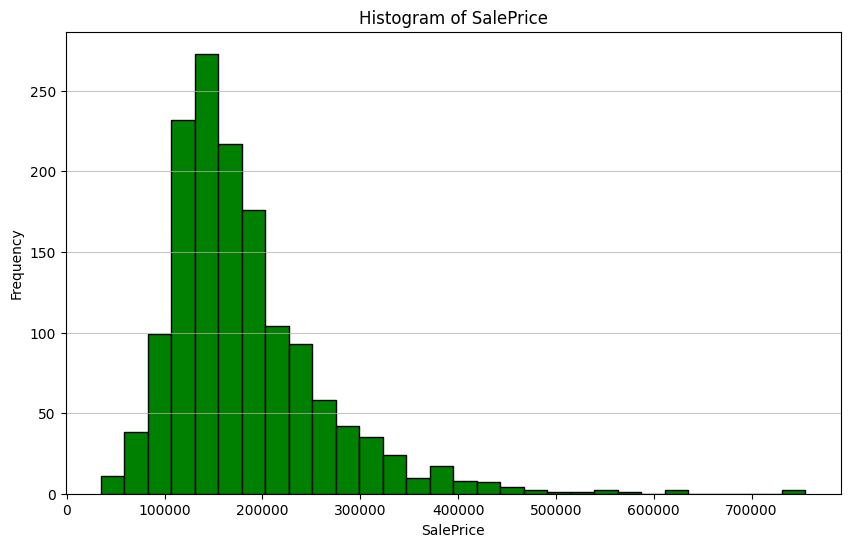

In [19]:
# Plotting the histogram for the 'SalePrice' column
plt.figure(figsize=(10, 6))
plt.hist(train_data['SalePrice'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

### Correlation Matrix Heatmap

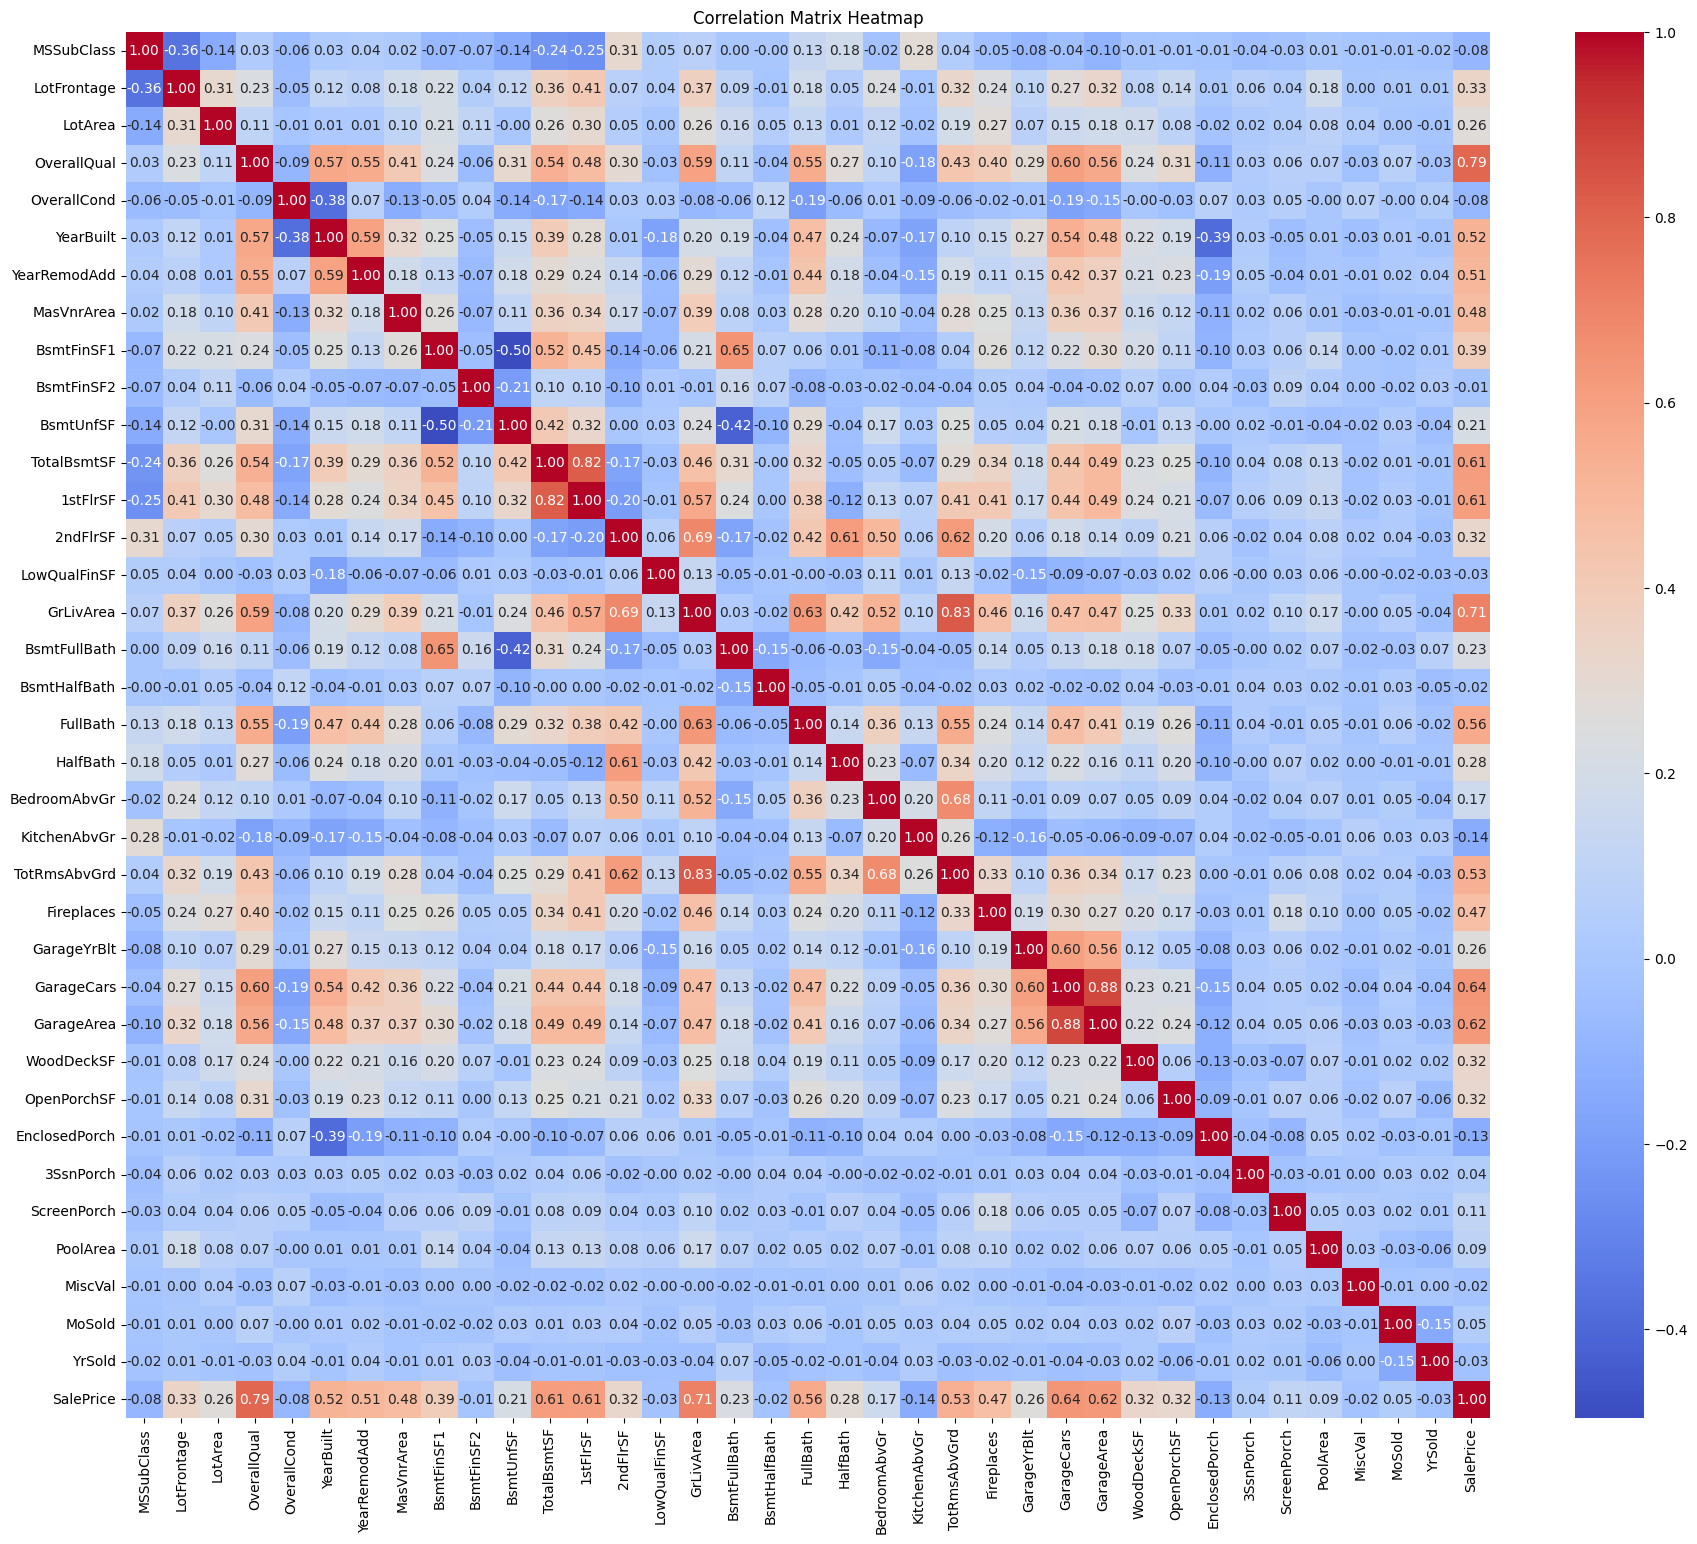

Correlation with SalePrice:
 SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.475233
Fireplaces       0.466968
BsmtFinSF1       0.386436
LotFrontage      0.334922
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
GarageYrBlt      0.261413
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: Sal

In [20]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(22, 18))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Display the correlation matrix heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

# ### Top Correlated Features with SalePrice

# Identify and display the top 5 features correlated with 'SalePrice'
top_n = 6
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
top_correlated_features = correlation_with_saleprice[1:].head(top_n)

# Display the correlation values with 'SalePrice'
print("Correlation with SalePrice:\n", correlation_with_saleprice)
print("Top 5 correlation with SalePrice:", top_correlated_features)
print(f"Best correlation with SalePrice: {correlation_with_saleprice.index[1]} {correlation_with_saleprice.iloc[1]}")

### Box Plot of Sale Price vs Overall Quality

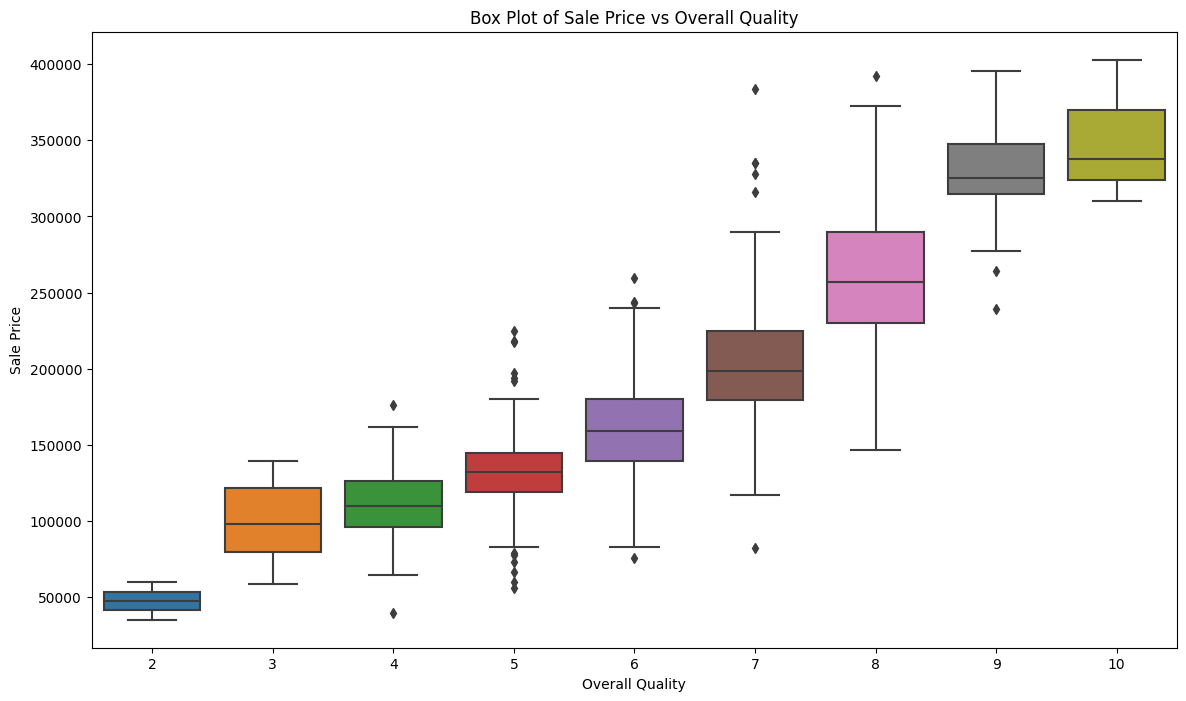

In [21]:
# Create a box plot using Seaborn to visualize the relationship between 'OverallQual' and 'SalePrice'
plt.figure(figsize=(14, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data_no_outliers)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price vs Overall Quality')
plt.show()

### Pair Plot of Highly Correlated Variables

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

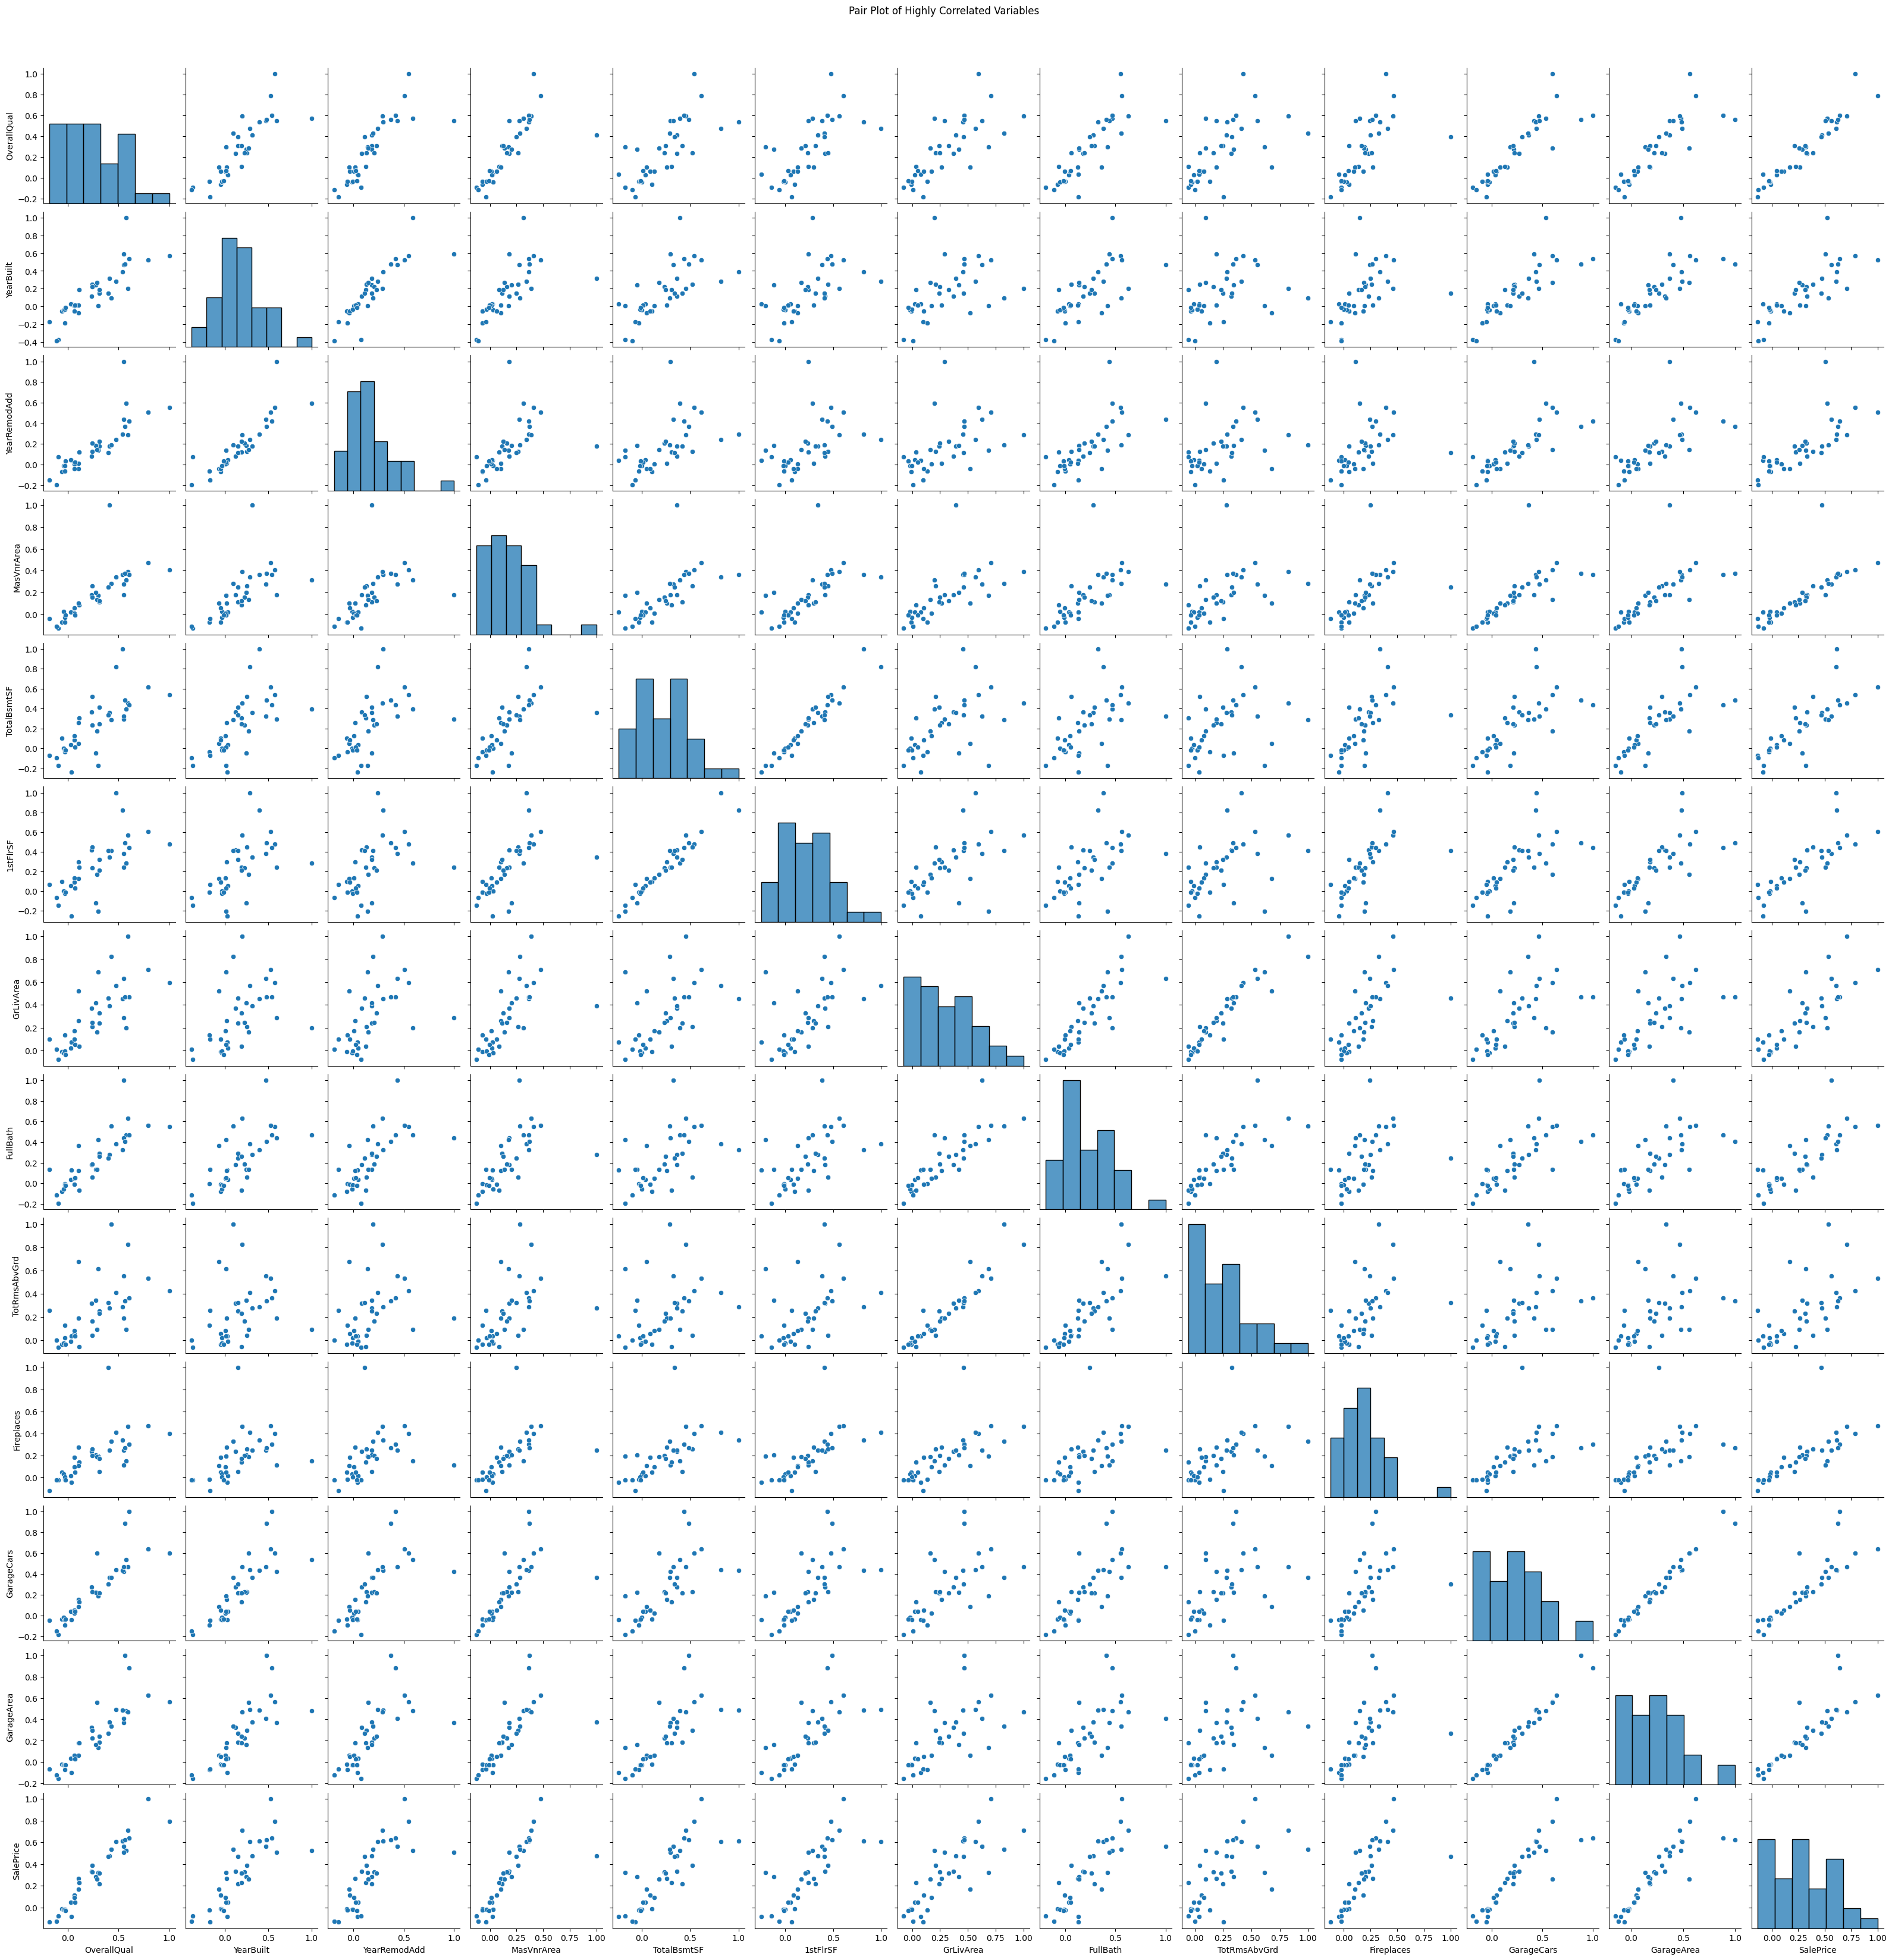

In [22]:
# Define a correlation threshold
correlation_threshold = 0.6

# Identify highly correlated variables based on the correlation matrix
highly_correlated_vars = correlation_matrix.corr().abs()['SalePrice'][correlation_matrix.corr().abs()['SalePrice'] > correlation_threshold].index

# Create a pair plot for highly correlated variables
sns.pairplot(correlation_matrix[highly_correlated_vars])
plt.suptitle("Pair Plot of Highly Correlated Variables", y=1.02)
plt.show()

## Feature Extraction

### One-Hot Encoding for Categorical Columns

In [23]:
# Identify categorical columns in the DataFrame without outliers
categorical_columns = train_data_no_outliers.select_dtypes(include=['object']).columns

# Apply one-hot encoding to create a new DataFrame
train_data_encoded = pd.get_dummies(train_data_no_outliers, columns=categorical_columns)

# Display the original and resulting DataFrames
print("Original DataFrame:")
display(train_data_no_outliers.head())

print("\nDataFrame after one-hot encoding:")
display(train_data_encoded.head())

Original DataFrame:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
7,20,RL,75.0,10084,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,307000
11,20,RL,70.0,11200,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,129500



DataFrame after one-hot encoding:


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,False,False,False,True,False,False,False,False,True,False
11,20,70.0,11200,5,5,1965,1965,0.0,906,0,...,False,False,False,True,False,False,False,False,True,False


### Feature Scaling: Standardization

In [24]:
# Store the original column names
original_column_names = train_data_encoded.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features in the DataFrame using StandardScaler
scaled_data = scaler.fit_transform(train_data_encoded)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_data)

# Replace the original numerical features in the original DataFrame with the scaled features
train_data_encoded = scaled_df
train_data_encoded.columns = original_column_names

# Add an 'Id' column and set it as the index
train_data_encoded['Id'] = range(1, len(scaled_df) + 1)
train_data_encoded.set_index('Id', inplace=True)

# Display the DataFrame after feature scaling
train_data_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.152596,-0.165209,-0.216135,0.664666,-0.533889,0.938352,0.799828,0.833684,0.696217,-0.249933,...,-0.045502,-0.318200,-0.032158,0.386838,-0.250137,-0.032158,-0.045502,-0.107211,0.448322,-0.322122
2,0.152596,-0.000198,0.556235,0.664666,-0.533889,0.867928,0.750891,0.575454,0.155263,-0.249933,...,-0.045502,-0.318200,-0.032158,0.386838,-0.250137,-0.032158,-0.045502,-0.107211,0.448322,-0.322122
3,0.152596,0.879860,1.386532,1.440778,-0.533889,0.832716,0.653017,2.003315,0.570814,-0.249933,...,-0.045502,-0.318200,-0.032158,0.386838,-0.250137,-0.032158,-0.045502,-0.107211,0.448322,-0.322122
4,-0.849696,0.384827,0.234598,1.440778,-0.533889,0.973564,0.897703,0.757734,2.326458,-0.249933,...,-0.045502,-0.318200,-0.032158,0.386838,-0.250137,-0.032158,-0.045502,-0.107211,0.448322,-0.322122
5,-0.849696,0.109809,0.542442,-0.887558,-0.533889,-0.399698,-1.059781,-0.654937,1.187994,-0.249933,...,-0.045502,-0.318200,-0.032158,0.386838,-0.250137,-0.032158,-0.045502,-0.107211,0.448322,-0.322122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,-0.849696,0.549838,0.007852,1.440778,-0.533889,1.114411,1.093451,0.818494,-1.039755,-0.249933,...,-0.045502,3.142675,-0.032158,-2.585061,-0.250137,-0.032158,-0.045502,-0.107211,-2.230540,3.104410
965,3.159471,-1.815319,-1.533300,-0.887558,-0.533889,1.008776,0.897703,-0.047336,0.305255,-0.249933,...,-0.045502,-0.318200,-0.032158,0.386838,-0.250137,-0.032158,-0.045502,-0.107211,0.448322,-0.322122
966,-0.849696,-0.330220,-0.478188,0.664666,-0.533889,0.973564,0.897703,-0.654937,-0.031612,-0.249933,...,-0.045502,-0.318200,-0.032158,0.386838,-0.250137,-0.032158,-0.045502,-0.107211,0.448322,-0.322122


### Feature Selection using Lasso Regression

In [25]:
# Drop 'SalePrice' from the feature set
X = train_data_encoded.drop('SalePrice', axis=1)

# Target variable
y = train_data_encoded['SalePrice']

# Apply Lasso regression with a specified alpha
alpha = 0.01  
lasso = Lasso(alpha=alpha)
lasso.fit(X, y)

# Identify important features based on non-zero coefficients
selected_features = X.columns[lasso.coef_ != 0]

# Create a DataFrame with the selected features
train_data_selected_features = train_data_encoded[selected_features]
train_data_selected_features

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,...,GarageQual_Fa,GarageCond_Fa,PavedDrive_P,SaleType_CWD,SaleType_ConLI,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.152596,-0.216135,0.664666,-0.533889,0.938352,0.799828,0.696217,-0.478815,0.627179,1.199286,...,-0.190795,-0.162822,-0.137649,-0.045502,-0.045502,-0.032158,-0.250137,-0.045502,-0.107211,-0.322122
2,0.152596,0.556235,0.664666,-0.533889,0.867928,0.750891,0.155263,-0.301017,0.806251,1.199286,...,-0.190795,-0.162822,-0.137649,-0.045502,-0.045502,-0.032158,-0.250137,-0.045502,-0.107211,-0.322122
3,0.152596,1.386532,1.440778,-0.533889,0.832716,0.653017,0.570814,0.324051,1.777011,1.199286,...,-0.190795,-0.162822,-0.137649,-0.045502,-0.045502,-0.032158,-0.250137,-0.045502,-0.107211,-0.322122
4,-0.849696,0.234598,1.440778,-0.533889,0.973564,0.897703,2.326458,1.826995,0.589479,1.199286,...,-0.190795,-0.162822,-0.137649,-0.045502,-0.045502,-0.032158,-0.250137,-0.045502,-0.107211,-0.322122
5,-0.849696,0.542442,-0.887558,-0.533889,-0.399698,-1.059781,1.187994,0.032353,-0.951484,1.199286,...,-0.190795,-0.162822,-0.137649,-0.045502,-0.045502,-0.032158,-0.250137,-0.045502,-0.107211,-0.322122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,-0.849696,0.007852,1.440778,-0.533889,1.114411,1.093451,-1.039755,1.513071,0.316159,-0.833829,...,-0.190795,-0.162822,-0.137649,-0.045502,-0.045502,-0.032158,-0.250137,-0.045502,-0.107211,3.104410
965,3.159471,-1.533300,-0.887558,-0.533889,1.008776,0.897703,0.305255,-1.337243,-0.876086,1.199286,...,-0.190795,-0.162822,-0.137649,-0.045502,-0.045502,-0.032158,-0.250137,-0.045502,-0.107211,-0.322122
966,-0.849696,-0.478188,0.664666,-0.533889,0.973564,0.897703,-0.031612,0.535186,-0.525010,1.199286,...,-0.190795,-0.162822,-0.137649,-0.045502,-0.045502,-0.032158,-0.250137,-0.045502,-0.107211,-0.322122


### Feature Engineering: Creating Additional Features

In [26]:
# Calculate 'TotalBathrooms' as the sum of 'BsmtFullBath' and 'FullBath'
train_data_selected_features.loc[:, 'TotalBathrooms'] = train_data_selected_features['BsmtFullBath'] + train_data_selected_features['FullBath']

# Calculate 'TotalSF' as the sum of 'GrLivArea' and 'TotalBsmtSF'
train_data_selected_features.loc[:, 'TotalSF'] = train_data_selected_features['GrLivArea'] + train_data_selected_features['TotalBsmtSF']

# Calculate 'AgeAtSale' as the difference between the current year and 'YearBuilt'
train_data_selected_features.loc[:, 'AgeAtSale'] = pd.Timestamp.now().year - train_data_selected_features['YearBuilt']

# Calculate 'GarageScore' as the sum of 'GarageQual_Fa' and 'GarageCond_Fa'
train_data_selected_features.loc[:, 'GarageScore'] = train_data_selected_features['GarageQual_Fa'] + train_data_selected_features['GarageCond_Fa']

# Calculate 'ExterQual_TA_Ex' as the product of 'ExterQual_TA' and 'ExterQual_Ex'
train_data_selected_features.loc[:, 'ExterQual_TA_Ex'] = train_data_selected_features['ExterQual_TA'] * train_data_selected_features['ExterQual_Ex']

# Calculate 'BsmtQual_TA_Ex' as the product of 'BsmtQual_TA' and 'BsmtQual_Ex'
train_data_selected_features.loc[:, 'BsmtQual_TA_Ex'] = train_data_selected_features['BsmtQual_TA'] * train_data_selected_features['BsmtQual_Ex']

# Calculate 'KitchenQual_TA_Ex' as the product of 'KitchenQual_TA' and 'KitchenQual_Ex'
train_data_selected_features.loc[:, 'KitchenQual_TA_Ex'] = train_data_selected_features['KitchenQual_TA'] * train_data_selected_features['KitchenQual_Ex']

# Calculate 'OverallGrade' as the product of 'OverallQual' and 'OverallCond'
train_data_selected_features.loc[:, 'OverallGrade'] = train_data_selected_features['OverallQual'] * train_data_selected_features['OverallCond']

# Calculate 'GarageAreaPerCar' as the ratio of 'GarageArea' to 'GarageCars'
train_data_selected_features.loc[:, 'GarageAreaPerCar'] = train_data_selected_features['GarageArea'] / train_data_selected_features['GarageCars']

# Calculate 'OutdoorSF' as the sum of 'WoodDeckSF', 'OpenPorchSF', and 'ScreenPorch'
train_data_selected_features.loc[:, 'OutdoorSF'] = train_data_selected_features['WoodDeckSF'] + train_data_selected_features['OpenPorchSF'] + train_data_selected_features['ScreenPorch']

# Calculate 'FunctionalScore' as the sum of 'Functional_Maj1', 'Functional_Mod', and 'Functional_Typ'
train_data_selected_features.loc[:, 'FunctionalScore'] = train_data_selected_features['Functional_Maj1'] + train_data_selected_features['Functional_Mod'] + train_data_selected_features['Functional_Typ']

# Calculate 'FireplaceQu_Fa_Gd' as the product of 'FireplaceQu_Fa' and 'FireplaceQu_Gd'
train_data_selected_features.loc[:, 'FireplaceQu_Fa_Gd'] = train_data_selected_features['FireplaceQu_Fa'] * train_data_selected_features['FireplaceQu_Gd']

# Calculate 'BsmtScore' as the sum of 'BsmtQual_Ex', 'BsmtCond_Fa', and 'BsmtExposure_Gd'
train_data_selected_features.loc[:, 'BsmtScore'] = train_data_selected_features['BsmtQual_Ex'] + train_data_selected_features['BsmtCond_Fa'] + train_data_selected_features['BsmtExposure_Gd']

# Display the DataFrame after feature engineering
train_data_selected_features

/tmp/ipykernel_42/3882375557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_selected_features.loc[:, 'TotalBathrooms'] = train_data_selected_features['BsmtFullBath'] + train_data_selected_features['FullBath']
/tmp/ipykernel_42/3882375557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_selected_features.loc[:, 'TotalSF'] = train_data_selected_features['GrLivArea'] + train_data_selected_features['TotalBsmtSF']
/tmp/ipykernel_42/3882375557.py:8: SettingWithCopyWarning: 
A value i

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,...,GarageScore,ExterQual_TA_Ex,BsmtQual_TA_Ex,KitchenQual_TA_Ex,OverallGrade,GarageAreaPerCar,OutdoorSF,FunctionalScore,FireplaceQu_Fa_Gd,BsmtScore
Id,,,,,,,,,,,,,,,,,,,,,
1,0.152596,-0.216135,0.664666,-0.533889,0.938352,0.799828,0.696217,-0.478815,0.627179,1.199286,...,-0.353617,0.162638,0.228548,0.223485,-0.354858,1.295377,-0.713579,0.081119,0.085476,-0.704773
2,0.152596,0.556235,0.664666,-0.533889,0.867928,0.750891,0.155263,-0.301017,0.806251,1.199286,...,-0.353617,0.162638,0.228548,0.223485,-0.354858,2.562779,-1.069385,0.081119,0.085476,-0.704773
3,0.152596,1.386532,1.440778,-0.533889,0.832716,0.653017,0.570814,0.324051,1.777011,1.199286,...,-0.353617,0.162638,0.228548,0.223485,-0.769215,1.057861,1.502407,0.081119,0.085476,-0.704773
4,-0.849696,0.234598,1.440778,-0.533889,0.973564,0.897703,2.326458,1.826995,0.589479,1.199286,...,-0.353617,0.162638,-2.977742,0.223485,-0.769215,3.154233,1.582582,0.081119,-0.246817,3.181837
5,-0.849696,0.542442,-0.887558,-0.533889,-0.399698,-1.059781,1.187994,0.032353,-0.951484,1.199286,...,-0.353617,-0.116500,-0.335825,-0.248859,0.473857,0.435924,-1.855902,0.081119,0.085476,-0.704773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,-0.849696,0.007852,1.440778,-0.533889,1.114411,1.093451,-1.039755,1.513071,0.316159,-0.833829,...,-0.353617,0.162638,0.228548,-4.018345,-0.769215,1.069974,-1.181744,0.081119,-0.246817,-0.704773
965,3.159471,-1.533300,-0.887558,-0.533889,1.008776,0.897703,0.305255,-1.337243,-0.876086,1.199286,...,-0.353617,-0.116500,0.228548,-0.248859,0.473857,0.809540,-1.331557,0.081119,0.085476,3.379506
966,-0.849696,-0.478188,0.664666,-0.533889,0.973564,0.897703,-0.031612,0.535186,-0.525010,1.199286,...,-0.353617,0.162638,0.228548,0.223485,-0.354858,-1.830881,0.260204,0.081119,0.085476,-0.704773


### Data Splitting: Training and Testing Sets

In [27]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(train_data_selected_features, y, test_size=0.2, random_state=42)

### Shapes of Training and Testing Data

In [28]:
# Print the shapes of the training and testing data
print("Training Data Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Data Shape:", X_val.shape)
print("Testing Labels Shape:", y_val.shape)

Training Data Shape: (774, 98)
Training Labels Shape: (774,)
Testing Data Shape: (194, 98)
Testing Labels Shape: (194,)


## Machine Learning Using MLkits

### Linear Regression Modeling

In [29]:
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_val)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, predictions)
# Print the MSE
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_val, predictions)
# Print the R-squared
print(f'R-squared (R2): {r2}')

Mean Squared Error: 0.086874141846294
R-squared (R2): 0.9261656527948672


### Decision Tree Regression Modeling

In [30]:
# Create and fit the Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Visualize the Decision Tree
# plt.figure(figsize=(90, 60))
# plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
# plt.show()

Mean Squared Error (MSE): 0.26187660303208354
R-squared (R2): 0.777431032730294


### Random Forest Regression Modeling

In [31]:
# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.15109931280289865
R-squared (R2): 0.8715806696118504


### Hyperparameter Tuning with GridSearchCV

In [32]:
# Define models and hyperparameter grids
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# Iterate through models
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Define hyperparameter grid
    param_grid = param_grids[model_name]

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best model and print results
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)

    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")

Training and evaluating Linear Regression...
Best hyperparameters: {}
Mean Squared Error: 0.086874141846294
R2 Score: 0.9261656527948672


Training and evaluating Decision Tree...
Best hyperparameters: {'max_depth': 20}
Mean Squared Error: 0.26282631671973883
R2 Score: 0.7766238709135607


Training and evaluating Random Forest...
Best hyperparameters: {'max_depth': None, 'n_estimators': 100}
Mean Squared Error: 0.15107006250666757
R2 Score: 0.8716055294433478




In [33]:
def preprocess_and_feature_engineer(data, selected_features):
    """
    Preprocess and feature engineer the input data based on specified selected features.
    
    Parameters:
    - data: DataFrame, input data to be processed
    - selected_features: list, features to be selected
    
    Returns:
    - DataFrame, preprocessed and feature-engineered data
    """
    garage_feats = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
    basement_feats = ['BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2'] 
    
    data = data.copy()  # Create a copy of the DataFrame
    
    # Handling missing values for specific columns
    data['PoolQC'] = data['PoolQC'].replace({np.nan:'No Pool'})
    data['MiscFeature'] = data['MiscFeature'].replace({np.nan:'None'})
    data['Alley'] = data['Alley'].replace({np.nan:'No alley access'})
    data['Fence'] = data['Fence'].replace({np.nan:'No Fence'})
    data['MasVnrType'] = data['MasVnrType'].replace({np.nan:'None'})
    data['FireplaceQu'] = data['FireplaceQu'].replace({np.nan:'No Fireplace'})
    data['GarageYrBlt'] = data['GarageYrBlt'].replace({np.nan:0})
    data[garage_feats] = data[garage_feats].replace({np.nan:'No Garage'})
    data[basement_feats] = data[basement_feats].replace({np.nan:'No Basement'})
    
    # Handling missing values for numerical columns
    data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
    data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)
    
    # Remove rows with missing values for other columns
    data = data.dropna()
    
    # Identifying and removing outliers using Z-Score
    numerical_columns_names = data.select_dtypes(include=['int64', 'float64']).columns
    numerical_columns = data[numerical_columns_names]
    
    z_scores = np.abs(stats.zscore(numerical_columns))
    threshold = 3
    outliers = (z_scores > threshold).any(axis=1)
    data_no_outliers = data[~outliers]
    
    # One-hot encoding for categorical columns
    categorical_columns = data_no_outliers.select_dtypes(include=['object']).columns
    data_encoded = pd.get_dummies(data_no_outliers, columns=categorical_columns)
    
    # Standard Scaling for numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_encoded)
    scaled_df = pd.DataFrame(scaled_data)
    scaled_df.columns = data_encoded.columns
    
    # Feature engineering
    data_selected_features = scaled_df[selected_features].copy()
    data_selected_features['TotalBathrooms'] = data_selected_features['BsmtFullBath'] + data_selected_features['FullBath']
    data_selected_features['TotalSF'] = data_selected_features['GrLivArea'] + data_selected_features['TotalBsmtSF']
    data_selected_features['AgeAtSale'] = pd.Timestamp.now().year - data_selected_features['YearBuilt']
    data_selected_features['GarageScore'] = data_selected_features['GarageQual_Fa'] + data_selected_features['GarageCond_Fa']
    data_selected_features['ExterQual_TA_Ex'] = data_selected_features['ExterQual_TA'] * data_selected_features['ExterQual_Ex']
    data_selected_features['BsmtQual_TA_Ex'] = data_selected_features['BsmtQual_TA'] * data_selected_features['BsmtQual_Ex']
    data_selected_features['KitchenQual_TA_Ex'] = data_selected_features['KitchenQual_TA'] * data_selected_features['KitchenQual_Ex']
    data_selected_features['OverallGrade'] = data_selected_features['OverallQual'] * data_selected_features['OverallCond']
    data_selected_features['GarageAreaPerCar'] = data_selected_features['GarageArea'] / data_selected_features['GarageCars']
    data_selected_features['OutdoorSF'] = data_selected_features['WoodDeckSF'] + data_selected_features['OpenPorchSF'] + data_selected_features['ScreenPorch']
    data_selected_features['FunctionalScore'] = data_selected_features['Functional_Maj1'] + data_selected_features['Functional_Mod'] + data_selected_features['Functional_Typ']
    data_selected_features['FireplaceQu_Fa_Gd'] = data_selected_features['FireplaceQu_Fa'] * data_selected_features['FireplaceQu_Gd']
    data_selected_features['BsmtScore'] = data_selected_features['BsmtQual_Ex'] + data_selected_features['BsmtCond_Fa'] + data_selected_features['BsmtExposure_Gd']
    
    return data_selected_features

### Preprocessing and Feature Engineering for Test Data

In [34]:
# Apply the same preprocessing and feature engineering to the test data
test_data = preprocess_and_feature_engineer(test_data, selected_features)

# Display the preprocessed and feature-engineered test data
test_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,...,GarageScore,ExterQual_TA_Ex,BsmtQual_TA_Ex,KitchenQual_TA_Ex,OverallGrade,GarageAreaPerCar,OutdoorSF,FunctionalScore,FireplaceQu_Fa_Gd,BsmtScore
0,-0.884856,0.737707,-0.883527,0.494376,-0.485902,-1.185217,0.118512,-0.373786,-1.301737,-0.856572,...,-0.403981,-0.160421,-0.388239,-0.275703,-0.436794,-1.102567,2.867437,0.100636,0.098672,-0.788561
1,0.128913,1.379313,-0.883527,-0.562084,0.726900,0.578954,0.902114,-0.252094,0.461560,-0.856572,...,-0.403981,-0.160421,0.256421,-0.275703,0.496616,0.014001,0.661760,0.100636,0.098672,-0.788561
2,0.128913,0.259990,-0.148749,0.494376,0.760588,0.578954,0.443597,-0.257385,0.401420,-0.856572,...,-0.403981,-0.160421,-0.388239,0.252594,-0.073538,-0.235110,2.070460,0.100636,-0.286227,-0.788561
3,1.649566,-1.185076,1.320806,-0.562084,0.558455,0.292872,-0.378821,0.679110,-0.377991,-0.856572,...,-0.403981,0.209753,0.256421,0.252594,-0.742403,0.512225,3.750252,0.100636,0.098672,-0.788561
4,0.128913,0.266383,-0.148749,-0.562084,0.592144,0.388233,-1.016862,-0.688597,0.524105,-0.856572,...,-0.403981,-0.160421,0.256421,-0.275703,0.083610,-0.857890,1.056244,0.100636,0.098672,-0.788561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2.663334,-2.208216,-1.618305,-1.618543,-0.115324,-0.660733,-0.405507,-1.262663,-0.830241,-0.856572,...,6.075476,-0.160421,-0.388239,-0.275703,2.619295,1.012345,-1.919369,0.100636,0.098672,-0.788561
979,-0.884856,1.249713,-0.883527,-0.562084,-0.216391,-0.326971,-0.728166,0.213508,-0.185544,1.157806,...,-0.403981,-0.160421,-0.388239,-0.275703,0.496616,0.644341,-0.435565,0.100636,0.098672,-0.788561
980,2.663334,-2.193977,-1.618305,-0.562084,-0.182702,-0.756094,-0.027049,-1.262663,-0.830241,-0.856572,...,-0.403981,-0.160421,-0.388239,-0.275703,0.909622,0.866030,-1.919369,0.100636,0.098672,-0.788561
981,2.663334,-2.089077,-1.618305,-0.562084,-0.182702,-0.756094,-0.405507,-1.262663,-0.830241,-0.856572,...,-0.403981,-0.160421,-0.388239,-0.275703,0.909622,0.866030,-1.485189,0.100636,0.098672,-0.788561


### Making Predictions with Linear Regression on Test Data

In [35]:
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(test_data)

# Display the number of predictions
len(predictions)

983

In [37]:
# Create a DataFrame for predictions
pred_df = pd.DataFrame(predictions, columns=['PredictedPrice'])

# Concatenate the predictions with the preprocessed test data
output_df = pd.concat([test_data.reset_index(drop=True), pred_df], axis=1)

# Save the combined DataFrame to CSV
output_df.to_csv("submission.csv", index=False)
